In my other notebook I made an analisys about the features you can check in the next [Bank Churn Analisys](https://www.kaggle.com/code/carlosalvro/bank-churn-analisys) 

The purpose of this notebook is compare the score of the model with different situations.
- Original Features of the dataset vs the new features that we can infer. 
- Applying one hot encoding vs ordinal encoder.
- Scaling the data vs not.

Using the next models.
- GradientBoostingClassifier
- LightGBMClassifier
- CatBoostClassifier
Here I will compare the 8 combinations

1. Original Features with one hot encoding and without scaling (OrHotNS)
2. Original Features with one hot encoding and scaling (OrHotS)
3. Original Features with ordinal encoder and without scaling  (OrEnNS)
4. Original Features with ordinal encoder and scaling  (OrEnS)
5. New Features with one hot encoding and without scaling (NeHotNS)
6. New Features with one hot encoding and scaling (NeHotS)
7. New Features with ordinal encoder and without scaling  (NeEnNS)
8. New Features with ordinal encoder and scaling  (NeEnS)

If you consider this notebook help you please upvote 🔺

**@CarlosAlvro**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
train[['Age','HasCrCard','IsActiveMember']] = train[['Age','HasCrCard','IsActiveMember']].astype(int)

In [3]:
models = {
    'GBC': GradientBoostingClassifier(n_estimators=100, validation_fraction=0.15),
    'LGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

In [4]:
X = train.drop(['id','CustomerId', 'Surname', 'Exited'], axis=1)
y = train['Exited']

In [5]:
def train_models(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
    scores = {}
    for name, model in models.items():
        print(f"training {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = roc_auc_score(y_pred, y_test)
        print(score)
        print("="*32)
        scores[name] = score
    
    return scores

def plot_barplot(scores):
    x_keys = list(scores.keys())
    y_values = list(scores.values())
    ax = sns.barplot(x=x_keys, y = y_values)
    for i, v in enumerate(y_values):
        ax.text(i, v, str(round(v,3)), ha='center', va='bottom')

    plt.show()

In [6]:
final_scores = {
    'OrHotNS':"",
    'OrHotS': "",
    'OrEnNS': "",
    'OrEnS': "",
    'NeHotNS': "",
    'NeHotS': "",
    'NeEnNS': "",
    'NeEnS': "",
}

# Original Features

Let's apply one hot encoder
#### OrHotNS

In [7]:
X_one_hot = pd.get_dummies(X, columns=['Geography','Gender'])

In [8]:
OrHotNS = train_models(X_one_hot, y)

training GBC
0.8155644061791933
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8158937187889925
training CatBoost
0.8164687069711661


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


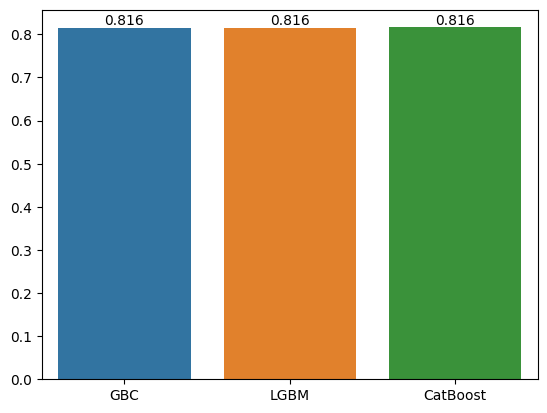

In [9]:
plot_barplot(OrHotNS)
final_scores['OrHotNS'] = OrHotNS

Now let's apply standard scaler to the features
#### OrHotS

In [10]:
scaler = StandardScaler()
X_scaled = X_one_hot.copy()
X_scaled[['CreditScore','Age','Tenure','Balance']] = scaler.fit_transform(X_scaled[['CreditScore','Age','Tenure','Balance']])

OrHotS = train_models(X_scaled, y)

training GBC
0.8202021686469593
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8177739136385667
training CatBoost
0.8184846732134203


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


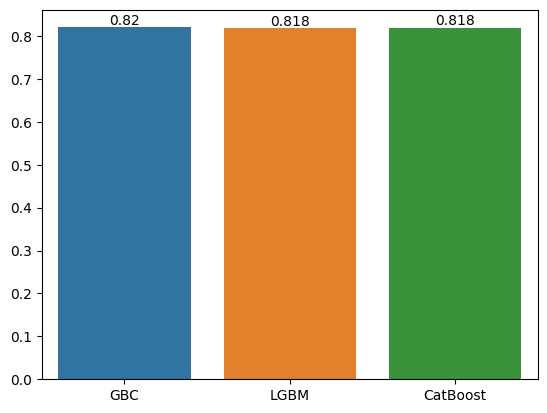

In [11]:
plot_barplot(OrHotS)
final_scores['OrHotS'] = OrHotS

### Ordinal Encoder
#### OrEnNS

In [12]:
encoder = OrdinalEncoder()
cols = X.columns.tolist()
X_encoder  = encoder.fit_transform(X)
X_encoder = pd.DataFrame(X_encoder, columns=cols)
X_encoder = X_encoder.astype(int)

training GBC
0.8111819280594504
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8135221389249894
training CatBoost
0.8140991951214533


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


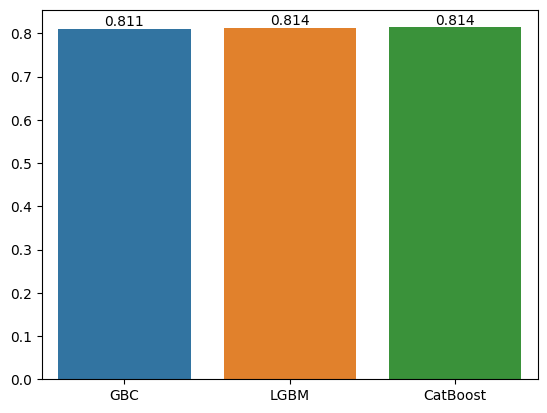

In [13]:
OrEnNS = train_models(X_encoder, y)
plot_barplot(OrEnNS)
final_scores['OrEnNS'] = OrEnNS

In [14]:
X_encoder

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,274,0,1,15,3,0,1,1,0,52408
1,233,0,1,15,1,0,1,1,1,5312
2,284,0,1,22,10,0,1,1,0,53528
3,187,0,1,16,2,26366,0,1,1,15979
4,322,2,1,15,5,0,1,1,1,1630
...,...,...,...,...,...,...,...,...,...,...
165029,273,2,0,15,2,0,0,1,1,32274
165030,398,0,1,17,3,0,0,0,0,32272
165031,171,0,1,13,5,0,0,1,1,30692
165032,160,2,0,12,7,28444,0,0,1,11575


#### OrEnS

training GBC
0.8181991332716926
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8158787756854766
training CatBoost
0.818178785716718


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


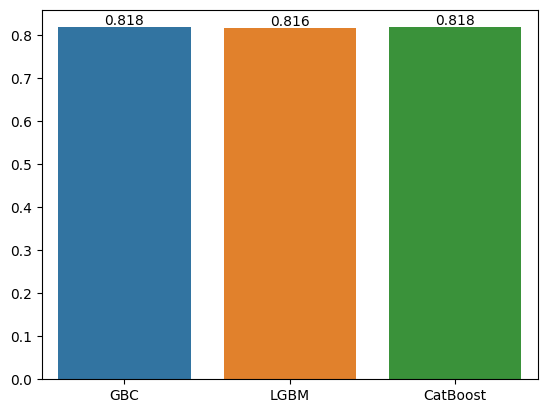

In [15]:
scaler = StandardScaler()
X_scaled_encoder = X_encoder.copy()
X_scaled_encoder[['CreditScore','Age','Tenure','Balance']] = scaler.fit_transform(X_scaled_encoder[['CreditScore','Age','Tenure','Balance']])

OrEnS = train_models(X_scaled_encoder, y)
plot_barplot(OrEnS)
final_scores['OrEnS'] = OrEnS

# New Features

In [16]:
X_nfeat = X.copy()

In [17]:
bins = [18, 25, 45, 60, float('inf')]
labels = ["Y", "YA", "MA", "E"]
X_nfeat['AgeCategory'] = pd.cut(X_nfeat['Age'], bins=bins, labels=labels, right=False)


In [18]:
X_nfeat['ActiveByCrCard'] = X_nfeat['HasCrCard'] * X_nfeat['IsActiveMember']

In [19]:
X_nfeat['TenureActive'] = X_nfeat['Tenure'] * X_nfeat['IsActiveMember']

In [20]:
X_nfeat['ActiveBalance'] =  np.ones(len(X_nfeat))

X_nfeat.loc[(X_nfeat['IsActiveMember']==0) & (X_nfeat['Balance']==0), 'ActiveBalance'] = 0

In [21]:
X_nfeat

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeCategory,ActiveByCrCard,TenureActive,ActiveBalance
0,668,France,Male,33,3,0.00,2,1,0,181449.97,YA,0,0,0.0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,YA,1,1,1.0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,YA,0,0,0.0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,YA,1,2,1.0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,YA,1,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33,2,0.00,1,1,1,131834.75,YA,1,2,1.0
165030,792,France,Male,35,3,0.00,1,0,0,131834.45,YA,0,0,0.0
165031,565,France,Male,31,5,0.00,1,1,1,127429.56,YA,1,5,1.0
165032,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,YA,0,7,1.0


#### NeHotNs

training GBC
0.8170695540246374
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.814370972316111
training CatBoost
0.8153633504554585


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


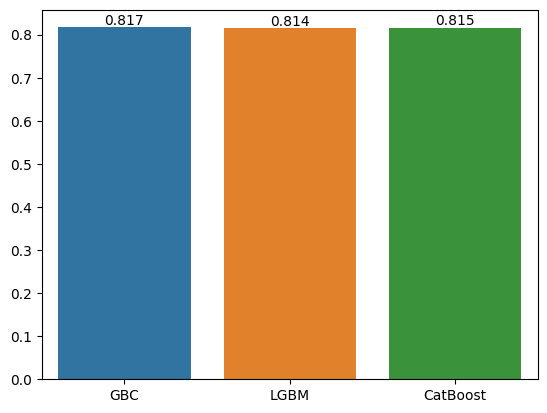

In [22]:
X_nf_one_hot = pd.get_dummies(X_nfeat, columns=['Geography','Gender','AgeCategory'])
NeHotNs = train_models(X_nf_one_hot, y)
plot_barplot(NeHotNs)
final_scores['NeHotNS'] = NeHotNs

#### NeHotS

In [23]:
scaler = StandardScaler()
X_scaled = X_nf_one_hot.copy()
X_scaled[['CreditScore','Age','Tenure','Balance']] = scaler.fit_transform(X_scaled[['CreditScore','Age','Tenure','Balance']])


training GBC
0.8154178022234437
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8131361412592809
training CatBoost
0.815282286580745


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


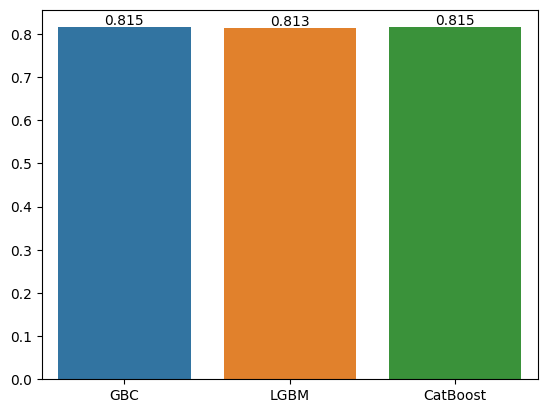

In [24]:
NeHotS = train_models(X_scaled, y)
plot_barplot(NeHotS)
final_scores['NeHotS'] = NeHotS

#### NeEnNS

In [25]:
encoder = OrdinalEncoder()
cols = X_nfeat.columns.tolist()
X_encoder  = encoder.fit_transform(X_nfeat)
X_encoder = pd.DataFrame(X_encoder, columns=cols)
X_encoder = X_encoder.astype(int)

training GBC
0.8128906117033797
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8097039330210426
training CatBoost
0.8121583027173267


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


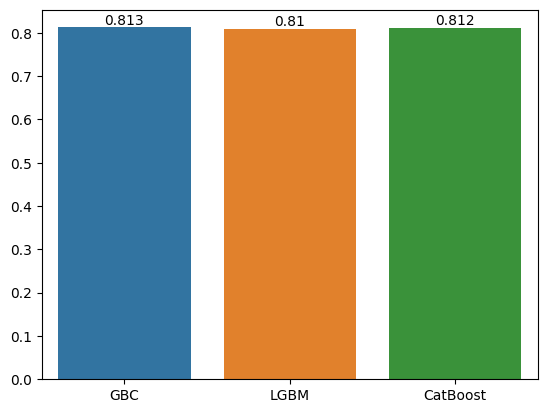

In [26]:
NeEnNS = train_models(X_encoder, y)
plot_barplot(NeEnNS)
final_scores['NeEnNS'] = NeEnNS

#### NeEnS

training GBC
0.8210001486590999
training LGBM
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
0.8171740734791182
training CatBoost
0.8197618136122293


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


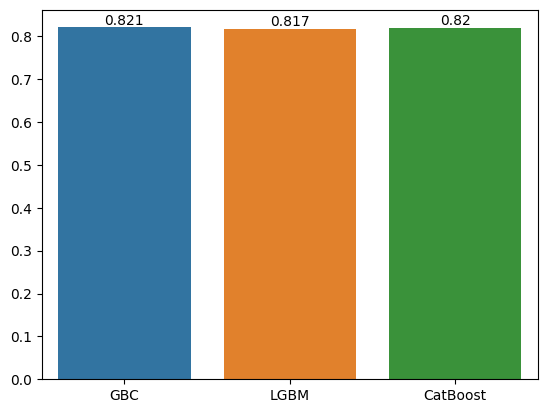

In [27]:
scaler = StandardScaler()
X_scaled_encoder = X_encoder.copy()
X_scaled_encoder[['CreditScore','Age','Tenure','Balance']] = scaler.fit_transform(X_scaled_encoder[['CreditScore','Age','Tenure','Balance']])

NeEnS = train_models(X_scaled_encoder, y)
plot_barplot(NeEnS)
final_scores['NeEnS'] = NeEnS

---

In [28]:
final_scores

{'OrHotNS': {'GBC': 0.8155644061791933,
  'LGBM': 0.8158937187889925,
  'CatBoost': 0.8164687069711661},
 'OrHotS': {'GBC': 0.8202021686469593,
  'LGBM': 0.8177739136385667,
  'CatBoost': 0.8184846732134203},
 'OrEnNS': {'GBC': 0.8111819280594504,
  'LGBM': 0.8135221389249894,
  'CatBoost': 0.8140991951214533},
 'OrEnS': {'GBC': 0.8181991332716926,
  'LGBM': 0.8158787756854766,
  'CatBoost': 0.818178785716718},
 'NeHotNS': {'GBC': 0.8170695540246374,
  'LGBM': 0.814370972316111,
  'CatBoost': 0.8153633504554585},
 'NeHotS': {'GBC': 0.8154178022234437,
  'LGBM': 0.8131361412592809,
  'CatBoost': 0.815282286580745},
 'NeEnNS': {'GBC': 0.8128906117033797,
  'LGBM': 0.8097039330210426,
  'CatBoost': 0.8121583027173267},
 'NeEnS': {'GBC': 0.8210001486590999,
  'LGBM': 0.8171740734791182,
  'CatBoost': 0.8197618136122293}}

In [29]:
scores = pd.DataFrame(final_scores)
scores

,OrHotNS,OrHotS,OrEnNS,OrEnS,NeHotNS,NeHotS,NeEnNS,NeEnS
GBC,0.815564,0.820202,0.811182,0.818199,0.817070,0.815418,0.812891,0.821000
LGBM,0.815894,0.817774,0.813522,0.815879,0.814371,0.813136,0.809704,0.817174
CatBoost,0.816469,0.818485,0.814099,0.818179,0.815363,0.815282,0.812158,0.819762


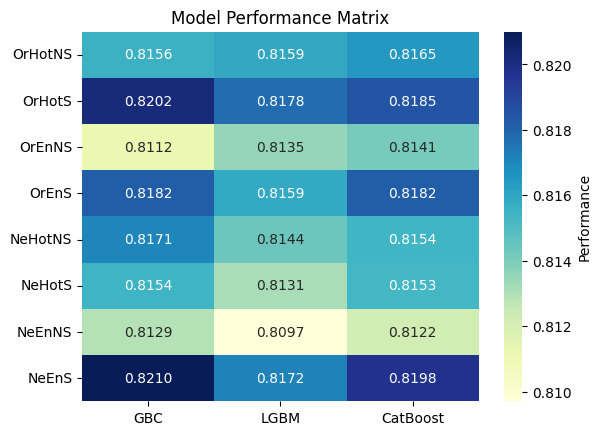

In [30]:
sns.heatmap(scores.T, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Performance'})
plt.title('Model Performance Matrix')
plt.show()

In [31]:
scoresT = scores.T
mean_values = scoresT.mean(axis=1)

mean_values_models = scores.mean(axis=1)

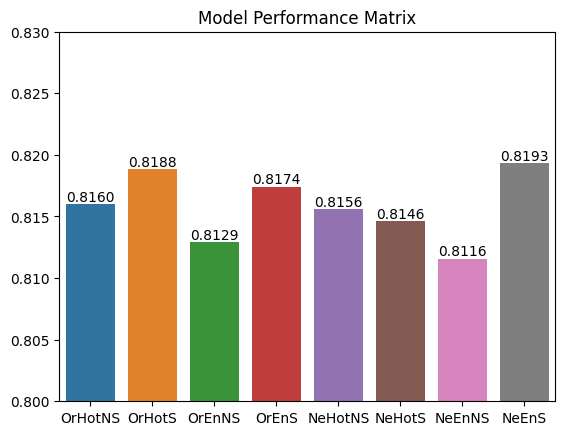

In [32]:
ax = sns.barplot(x=mean_values.index, y = mean_values.values)
for i, value in enumerate(mean_values.values):
    ax.text(i, value, f'{value:.4f}', ha='center', va='bottom')
plt.title('Model Performance Matrix')
plt.ylim(0.8, 0.83)
plt.show()

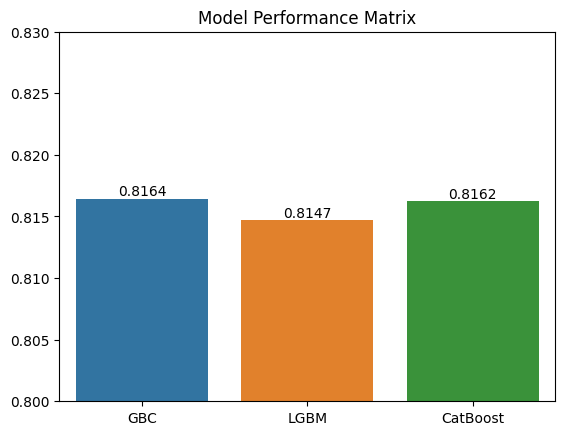

In [33]:
ax = sns.barplot(x=mean_values_models.index, y = mean_values_models.values)
for i, value in enumerate(mean_values_models.values):
    ax.text(i, value, f'{value:.4f}', ha='center', va='bottom')
plt.title('Model Performance Matrix')
plt.ylim(0.8, 0.83)
plt.show()

Now we can see the performance with different preprocessing and with different models.
Notice that the scale of the barplot start in 0.8, that's because if we start in 0 the difference it is not so visual. 

In general the performance is the same but we get more accuracy with the model GBC, just using the original features, applying ordinal encoder and scaling the data.

What other thing do you thing that are interesting about this? I read you in comments 😃

@CarlosAlvro